**<font color='red'>Report Submission Information (must be completed before submitting report!)</font>**

* Student 1 Full Name and Number : 
* Student 2 Full Name and Number : 
* Workshop day : e.g., Wednesday
* Workshop time : e.g., 12pm 

# Workshop 2 Part 2 - Graphs Network Routing 

## Objectives:

* Gain hands-on experience on network addressing, graphs, and routing protocols.
* Practical experience with IPv4 and MAC addresses, prefixes, and [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing) using python.
* Learn how to represent graphs.
* Program a basic routing protocol such as the Dijkstra’s algorithm.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
In this workshop you will gain practical experience on networking and graph theory basics we have covered in the classroom such as network addressing, graphs, and routing protocols. Firstly, you will learn how to program simple graphs in python using *networkx* library. Secondly, you will program a basic routing protocol such as the Dijkstra’s algorithm and find shortest paths on simple graphs. 

This workshop gives you a chance to implement the theory you have learned in the lectures and gain some practical experience on fundamentals of graphs and networking. The topics are especially relevant to Layers 2 and 3.

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (in this case in form of Jupyter Notebook) beforehand!    
2. Review relevant lecture slides on addressing, graph theory, and routing.
3. Read Chapter 4 from Tanenbaum and Chapter 5 from Kurose-Ross.
4. Read [netaddr](https://netaddr.readthedocs.io/en/latest/index.html) and [networkx](https://networkx.github.io/documentation/stable/index.html) documentation.
5. Practice your Python skills.
6. [optional] read introductory material about network science and graph theory.
7. _\[optional\]_ _You can start with workshop tasks and questions_


## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __preferably__ on the Python notebook itself! If you prefer, however, you can still provide answers as separate scripts and submit all in a zip file. The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be (part of) your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, ChatGPT, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the oral exam!__

# Section 1: Longest Prefix Match and Routing Tables

[Longest prefix matching](https://en.wikipedia.org/wiki/Longest_prefix_match) is used by internet routers 
to select the matching entry for an incoming packet from a forwarding table using the packet's destination address. This lookup functionality is often implemented in hardware as a [network search engine](https://en.wikipedia.org/wiki/Network_search_engine). There are very efficient algorithms for doing longest prefix matching using special data structures such as [trie, also called digital tree or prefix tree](https://en.wikipedia.org/wiki/Trie). 

*Hint: Here is a nice [online resource](https://www.geeksforgeeks.org/longest-common-prefix-using-character-by-character-matching/) as a starting point. Also note the more sophisticated variants there.*

### Simple, Illustrative Example

You have a simple router with a single input port and 4 output ports labeled as {a, b, c, d, e}. The router has the following forwarding table **forward_table** represented as a dictionary. Note that all packets that do not match to the table go to port e.

In [1]:
# %matplotlib notebook
from IPython import display
import numpy as np
import random 
import matplotlib.pyplot as plt

from netaddr import *
import pprint  #this is optional

**<font color='red'>Do not forget to change the variables below for full credit!</font>**

In [2]:
# Fixing random seed ensures that you always get the same pseudorandom numbers when using random package. 
# We do this to ensure reproducability but each group should have a different one. Here is a suggestion!
#
# You can use the hash of the ratio of your student numbers to obtain a unique, group-specific seed.

studentid1 = 1372750
studentid2 = 1454161
a = hash(studentid1/studentid2) # use a hash of a function of your student id numbers for random seed
random.seed(a) # needs to be called in each cell below

In [3]:
def gen_random_ipaddr(number):
    # generate number of random ip addresses as a list of strings
    addresses = []
    for i in range(number):
        random.seed(a+10+i)
        addresses.append(str(random.randrange(1,255))+"."+str(random.randrange(1,255))
                         +"."+str(random.randrange(1,255))+"."+str(random.randrange(1,255)))
    return addresses

def gen_random_subnet(prefix,seed_add):
    # generate a random subnet with given prefix as a string, taking also a seed_add 
    random.seed(a+seed_add)
    subnet = str(random.randrange(1,255))+"."+str(random.randrange(1,255)) \
                +"."+str(random.randrange(1,255))+".0"+"/"+str(prefix)
    return subnet

forward_table={gen_random_subnet(14,1):"a", gen_random_subnet(17,1):"b", 
                   gen_random_subnet(12, 5):"c",gen_random_subnet(18, 5):"d"}

print(forward_table)

{'92.134.50.0/14': 'a', '92.134.50.0/17': 'b', '225.57.137.0/12': 'c', '225.57.137.0/18': 'd'}


Assume that 12 different packets arrive to this router with the following IP addresses:

In [4]:
ip_addresses = gen_random_ipaddr(4)
for key in forward_table:
    ipbase = key.replace('/','.').split('.')
    random.seed(a+hash(key))
    ip_addresses.append(ipbase[0]+"."+ipbase[1]+"."+ipbase[2]+"."+str(random.randrange(1,255)))
    random.seed(a+hash(key)+2)
    ip_addresses.append(ipbase[0]+"."+ipbase[1]+"."+str(random.randrange(1,255))+"."+str(random.randrange(1,255)))

print(ip_addresses)  

['182.171.156.181', '204.136.153.183', '113.164.246.166', '56.139.138.117', '92.134.50.178', '92.134.142.71', '92.134.50.204', '92.134.121.94', '225.57.137.94', '225.57.63.66', '225.57.137.190', '225.57.70.242']


### Question 1.1.

Write a *simple* longest prefix matching algorithm (computational efficiency is **not** important) to assign these packets to their respective output ports. 

In [ ]:
''' Answer as code here '''
import ipaddress
packet_ports = {}

for ip in ip_addresses:
    # ip_obj = IPNetwork(ip)
    ip_obj = ipaddress.ip_address(ip)
    longest_prefix = -1
    selected_port = 'e'  # default port if no match
    for subnet, port in forward_table.items():
        # net = IPNetwork(subnet)
        net = ipaddress.ip_network(subnet, strict=False)
        if ip_obj in net:
            prefix_len = net.prefixlen
            if prefix_len > longest_prefix:
                longest_prefix = prefix_len
                selected_port = port
    packet_ports[ip] = selected_port

pprint.pprint(packet_ports)
print("Default port is 'e'")

{'113.164.246.166': 'e',
 '182.171.156.181': 'e',
 '204.136.153.183': 'e',
 '225.57.137.190': 'd',
 '225.57.137.94': 'd',
 '225.57.63.66': 'c',
 '225.57.70.242': 'c',
 '56.139.138.117': 'e',
 '92.134.121.94': 'b',
 '92.134.142.71': 'a',
 '92.134.50.178': 'b',
 '92.134.50.204': 'b'}
Default port is 'e'


**Answer as text here**

*Hint: You can use Python standard library **ipaddress** for convenience, see below:*

In [15]:
import ipaddress
addr = ipaddress.ip_address('159.206.52.59')
netw1 = ipaddress.ip_network('137.150.0.0/17')
addr in netw1

False

# Section 2: Graphs

In this section, you will define simple graphs using the networkx python library. 

Please refer to the [networkx library documentation](https://networkx.github.io/documentation/stable/index.html) for the following tasks.

In [17]:
import networkx as nx

We will first create and draw a simple undirected graph, which is predefined in the library using

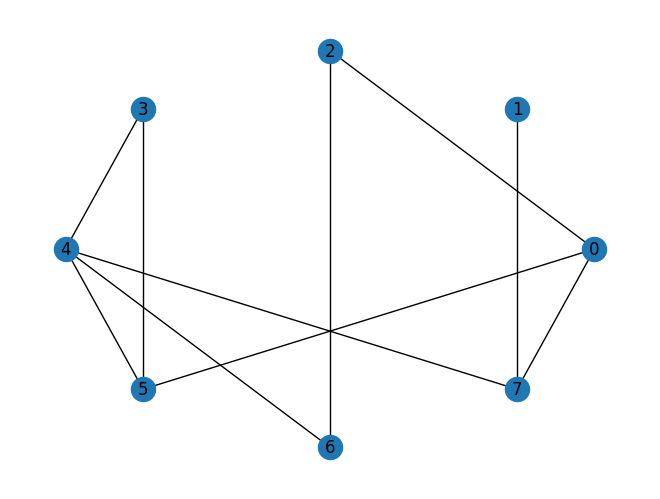

In [18]:
expmaze=nx.sedgewick_maze_graph()

plt.figure()
nx.draw_circular(expmaze, with_labels=True)

The networkx library provides multiple drawing options; feel free to experiment!

Next, let’s investigate some of the basic properties of this graph.

### Question 2.1. 

Find the list of nodes (vertices) and edges (links) of this graph. Find the list of node 4’s neighbours. What are the degrees of all the nodes and the mean degree of the graph?  

In [19]:
''' Answer as code here '''
# List of nodes (vertices)
nodes = list(expmaze.nodes())
print("Nodes:", nodes)

# List of edges (links)
edges = list(expmaze.edges())
print("Edges:", edges)

# Neighbours of node 4
neighbors_4 = list(expmaze.neighbors(4))
print("Neighbours of node 4:", neighbors_4)

# Degrees of all nodes
degrees = dict(expmaze.degree())
print("Degrees of all nodes:", degrees)

# Mean degree of the graph
mean_degree = sum(degrees.values()) / len(degrees)
print("Mean degree of the graph:", mean_degree)

Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]
Neighbours of node 4: [3, 5, 7, 6]
Degrees of all nodes: {0: 3, 1: 1, 2: 2, 3: 2, 4: 4, 5: 3, 6: 2, 7: 3}
Mean degree of the graph: 2.5


**Answer as text here**

### Question 2.2.

Find the adjacency matrix of this graph. Is the matrix symmetric? Why or why not?

In [21]:
''' Answer as code here '''
# Find the adjacency matrix of expmaze
adj_matrix = nx.adjacency_matrix(expmaze).todense()
print("Adjacency Matrix:\n", adj_matrix)

# Check if the matrix is symmetric
is_symmetric = (adj_matrix == adj_matrix.T).all()
print("Is the adjacency matrix symmetric:", is_symmetric)

Adjacency Matrix:
 [[0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 1 0 1 1 1]
 [1 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]]
Is the adjacency matrix symmetric: True


**Answer as text here**

In the graph above, it is an **undirected graph**. Therefore, for any edge (u, v), its two vertices u and v are adjacent. This is manifested in the adjacency matrix as a diagonal matrix.

# Section 3: Routing and Dijskstra’s Algorithm	

In this section, you will implement Dijkstra’s shortest path routing algorithm as discussed during lectures for simple graphs and check your answers using the networkx python library.

Let's create a graph representing a network first!

{('u', 'v'): Text(0.5000012499513105, 1.5000012499513105, '2'),
 ('u', 'w'): Text(0.9999950797646308, 1.4999975398823153, '5'),
 ('u', 'x'): Text(0.5000012499513105, 0.4999987500486896, '1'),
 ('v', 'x'): Text(1.0, 1.0000011748052204, '2'),
 ('v', 'w'): Text(1.5000020185252652, 2.0, '3'),
 ('x', 'w'): Text(1.49999713464058, 0.9999942692811603, '3'),
 ('x', 'y'): Text(1.5000020185252652, 0.0, '1'),
 ('w', 'y'): Text(2.0000000000000004, 1.0000011748052204, '1'),
 ('w', 'z'): Text(2.500001249951311, 1.4999987500486895, '5'),
 ('y', 'z'): Text(2.500001249951311, 0.5000012499513102, '2')}

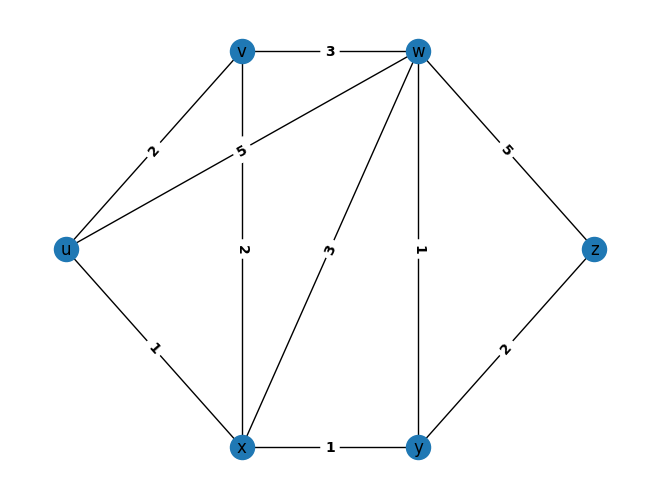

In [22]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(['u', 'v', 'x', 'w', 'y', 'z'])
G.add_weighted_edges_from([('u', 'v', 2), ('u', 'w', 5), ('u', 'x', 1), ('x', 'v', 2),
                           ('x', 'w', 3), ('x', 'y', 1), ('v', 'w', 3), ('y', 'w', 1),
                           ('y', 'z', 2), ('w', 'z', 5)])

# get labels and set positions
Glabels = nx.get_edge_attributes(G, 'weight')
pos = {'u': [0, 1], 'v': [1, 2], 'x': [1, 0], 'y': [2, 0], 'w': [2, 2], 'z': [3, 1]}

# Draw the graph
plt.figure()
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=Glabels, font_weight='bold')

Take the pseudocode of the Dijkstra’s algorithm provided in the lectures as a reference. Before you write your own implementation of the algorithm, here are a few useful **hints**: 

* You can rely on networkx library functions to access the properties of the graph defined in graph_for_routing.py . For example: G[‘u’], G.nodes(), G.edges(), etc.
* You can use python list as an ordered data structure to store the list of previous nodes.

### Question 3.1. 

Write your own implementation of Dijkstra’s algorithm in the form of a function, e.g. *mydijkstra(inputgraph,sourcenode)*. 

You can use the graph G in the provided above as the input. Your function should return 
1. the list of the distance of all nodes in the inputgraph to the given sourcenode (distance to self is zero)

2. the list of previous node(s) as part of the shortest path solution as discussed in lectures. Fully comment your code to demonstrate your understanding of the algorithm. 

Provide the full source code of your script along with your function below (or as a separate file).

> Note that although you can find many variants online, it is important that you write your own code in your own style. There are many ways of implementing Dijkstra’s algorithm depending on the data structures used. Do not worry about efficiency of your code for this exercise. 

In [ ]:
''' Answer as code here '''
import heapq
from collections import defaultdict

def dijkstra(graph, start_node):
    """
    Implementation of Dijkstra's algorithm for finding shortest paths in a graph.
    
    Args:
        graph: Adjacency list representation of the graph.
               graph[u] = [(v1, weight1), (v2, weight2), ...] 
               where u connects to v1 with weight1, etc.
        start_node: The starting node for the shortest path calculations.
    
    Returns:
        Dictionary mapping each node to its shortest distance from start_node.
        Nodes unreachable from start_node will have distance float('inf').
    """
    # Initialize all distances to infinity
    distances = defaultdict(lambda: float('inf'))
    distances[start_node] = 0
    
    # Priority queue: (distance, node)
    priority_queue = [(0, start_node)]
    
    # Set to track visited/processed nodes
    visited = set()
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Skip if we've already processed this node with a shorter distance
        if current_node in visited:
            continue
            
        visited.add(current_node)
        
        # Explore all neighbors of the current node
        for neighbor, edge_weight in graph[current_node]:
            if neighbor in visited:
                continue
                
            # Calculate new distance to neighbor
            new_distance = current_distance + edge_weight
            
            # Update if we found a shorter path
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(priority_queue, (new_distance, neighbor))
    
    return distances


# Create adjacency list from the graph
e = defaultdict(list)
for u, v, data in G.edges(data=True):
    e[u].append((v, data['weight']))
    e[v].append((u, data['weight']))  # because the graph is undirected

# Run Dijkstra's algorithm from node 'u'
shortest_paths = dijkstra(e, 'u')
# Convert defaultdict to a regular dict for clean output
shortest_paths = dict(shortest_paths)
print("Shortest paths from node 'u':", shortest_paths)


Shortest paths from node 'u': {'u': 0, 'v': 2, 'w': 3, 'x': 1, 'y': 2, 'z': 4}


**Answer as text here**

### Hints and Suggestions

* Note that ```G[anode]``` returns a dictionary of anode’s neighbours and weights of respective links 
and ```G.nodes()``` returns the list of nodes in graph G.
* You can convert a dictionary to a list and vice versa by using, e.g.

```outputlist=[(item,itemval) for item,itemval in inputdict.items()]``` 

This is called list comprehension which is an elegant feature of python.

```outputdict=dict([(item1,itemval1), (item2,itemval2), …])```
* Another neat trick with list comprehension is on the fly filtering, e.g.

```[(n,nval) for n,nval in InputDict.items() if n in AnotherList]```

### Question 3.2. 

Check your answer using the (single source) Dijsktra functions provided by the networkx library.

In [32]:
''' Answer as code here '''
# Use networkx built-in Dijkstra function to find shortest paths from node 'u'
nx_distances = nx.single_source_dijkstra_path_length(G, 'u')
print("NetworkX shortest path distances from node 'u':", nx_distances)

nx_prev_nodes = nx.single_source_dijkstra_path(G, 'u')
print("NetworkX shortest paths from node 'u':", nx_prev_nodes)

NetworkX shortest path distances from node 'u': {'u': 0, 'x': 1, 'v': 2, 'y': 2, 'w': 3, 'z': 4}
NetworkX shortest paths from node 'u': {'u': ['u'], 'v': ['u', 'v'], 'w': ['u', 'x', 'y', 'w'], 'x': ['u', 'x'], 'y': ['u', 'x', 'y'], 'z': ['u', 'x', 'y', 'z']}


**Answer as text here**

### *Optional* Bonus 

Further test your algorithm with two other small (but larger than 8 node) weighted graphs. Check your answers using the networkx library functions.

In [33]:
''' Answer as code here '''
# Create two additional small weighted graphs (with more than 8 nodes)

# First test graph
G1 = nx.Graph()
G1.add_weighted_edges_from([
    ('A', 'B', 3), ('A', 'C', 1), ('B', 'D', 2), ('C', 'D', 4),
    ('C', 'E', 8), ('D', 'E', 2), ('E', 'F', 5), ('F', 'G', 1),
    ('G', 'H', 2), ('H', 'I', 3), ('F', 'I', 7), ('D', 'G', 6)
])

# Second test graph
G2 = nx.Graph()
G2.add_weighted_edges_from([
    (1, 2, 2), (1, 3, 4), (2, 4, 1), (3, 4, 3), (3, 5, 2),
    (4, 6, 5), (5, 6, 1), (5, 7, 3), (6, 8, 2), (7, 8, 4),
    (8, 9, 1), (6, 9, 6), (2, 7, 7)
])

# Helper to convert networkx graph to adjacency list for our dijkstra function
def nx_to_adjlist(graph):
    adj = defaultdict(list)
    for u, v, data in graph.edges(data=True):
        adj[u].append((v, data['weight']))
        adj[v].append((u, data['weight']))
    return adj

# Test our Dijkstra implementation on G1
adj1 = nx_to_adjlist(G1)
my_distances_G1 = dijkstra(adj1, 'A')
print("My Dijkstra distances for G1 from 'A':", dict(my_distances_G1))
print("NetworkX distances for G1 from 'A':", nx.single_source_dijkstra_path_length(G1, 'A'))

# Test our Dijkstra implementation on G2
adj2 = nx_to_adjlist(G2)
my_distances_G2 = dijkstra(adj2, 1)
print("My Dijkstra distances for G2 from 1:", dict(my_distances_G2))
print("NetworkX distances for G2 from 1:", nx.single_source_dijkstra_path_length(G2, 1))

My Dijkstra distances for G1 from 'A': {'A': 0, 'B': 3, 'C': 1, 'D': 5, 'E': 7, 'G': 11, 'F': 12, 'H': 13, 'I': 16}
NetworkX distances for G1 from 'A': {'A': 0, 'C': 1, 'B': 3, 'D': 5, 'E': 7, 'G': 11, 'F': 12, 'H': 13, 'I': 16}
My Dijkstra distances for G2 from 1: {1: 0, 2: 2, 3: 4, 4: 3, 7: 9, 6: 7, 5: 6, 8: 9, 9: 10}
NetworkX distances for G2 from 1: {1: 0, 2: 2, 4: 3, 3: 4, 5: 6, 6: 7, 7: 9, 8: 9, 9: 10}


**Answer as text here**

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on *Canvas*.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in *Canvas* by the announced deadline. You should NOT zip all your files into one. You MUST submit your report as a PDF file SEPARATELY to pass the plagiarism check.
2. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!